# =============================================================
# MILESTONE 3: Machine Learning Model Development and Optimization
# =============================================================

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/Reemsoliiman/customer-churn-prediction-analysis/main/data/processed/cleaned_data.csv"
df = pd.read_csv(url)

# Features (X) and Target (y)

In [4]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train/test split (80/20) with stratification

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:", np.bincount(y_train))

Before SMOTE: [2280  386]



# Apply SMOTE only to training set

In [6]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_resampled))

After SMOTE: [2280 2280]


## LogisticRegression Model

In [7]:
log_reg = LogisticRegression(max_iter=1000, solver="liblinear") 
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  

Accuracy : 0.8650674662668666
Precision: 0.5466666666666666
Recall   : 0.422680412371134
F1-score : 0.47674418604651164
ROC-AUC  : 0.8526677518538615

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       570
           1       0.55      0.42      0.48        97

    accuracy                           0.87       667
   macro avg       0.73      0.68      0.70       667
weighted avg       0.85      0.87      0.86       667


Confusion Matrix:
 [[536  34]
 [ 56  41]]


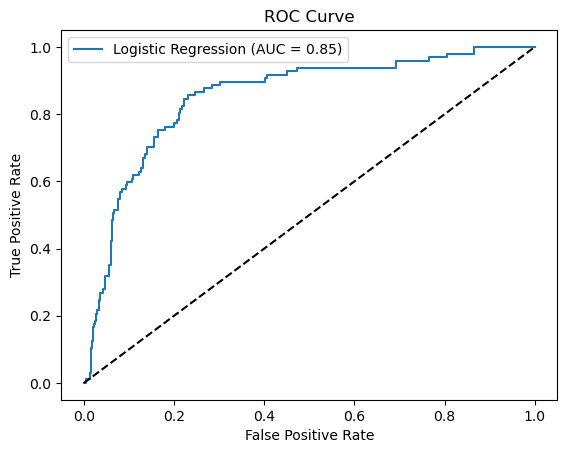

In [8]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)
print("ROC-AUC  :", roc_auc)

print("\n Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest Model


In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)

# Evaluate the Model


In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.952023988005997

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       571
           1       0.98      0.68      0.80        96

    accuracy                           0.95       667
   macro avg       0.97      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



# Generate and Visualize Confusion Matrix


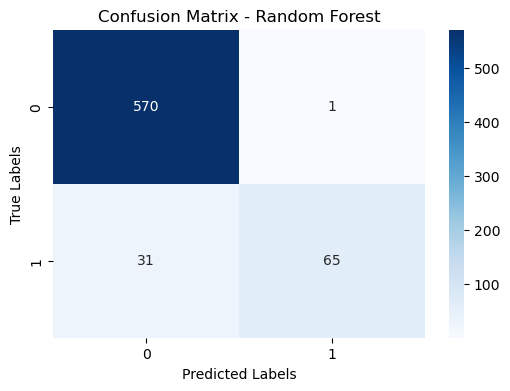

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()